In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [49]:

df = pd.read_csv("student_performance.csv")
print(df.head())


   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

In [50]:
#identiffy the features
features = df.columns
print(features)

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')


In [51]:
#identify the datatypes
data_types=df.dtypes
print(data_types)

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object


In [52]:
summary=df.describe()
print(summary)

         StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
max    3392.000000    18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.458971         1.122813   
min

In [53]:
print("This dataset contains detailed information about students, including various attributes that may influence their academic performance. Each record corresponds to a student, identified by a unique StudentID. Key demographic information includes Age, Gender (where 1 typically represents male and 0 represents female), and Ethnicity. ParentalEducation indicates the highest level of education attained by the student's parents, which can impact the student's academic support and environment.\n\n"
      "StudyTimeWeekly captures the average number of hours a student spends studying each week, providing insight into their academic dedication. The Absences column records the number of school days missed, which can affect their learning outcomes. Tutoring indicates whether the student receives additional academic help outside regular classes.\n\n"
      "ParentalSupport measures the level of involvement and support from the student's parents. Extracurricular shows participation in non-academic activities, and specific fields such as Sports and Music indicate involvement in sports and music activities, respectively. Volunteering captures engagement in community service.\n\n"
      "The dataset also includes academic performance indicators: GPA represents the student's grade point average, and GradeClass categorizes students into different academic standing or class levels based on their GPA. This comprehensive dataset allows for analysis of how various factors correlate with academic performance and can be used to identify areas where students may need additional support.")


This dataset contains detailed information about students, including various attributes that may influence their academic performance. Each record corresponds to a student, identified by a unique StudentID. Key demographic information includes Age, Gender (where 1 typically represents male and 0 represents female), and Ethnicity. ParentalEducation indicates the highest level of education attained by the student's parents, which can impact the student's academic support and environment.

StudyTimeWeekly captures the average number of hours a student spends studying each week, providing insight into their academic dedication. The Absences column records the number of school days missed, which can affect their learning outcomes. Tutoring indicates whether the student receives additional academic help outside regular classes.

ParentalSupport measures the level of involvement and support from the student's parents. Extracurricular shows participation in non-academic activities, and specifi

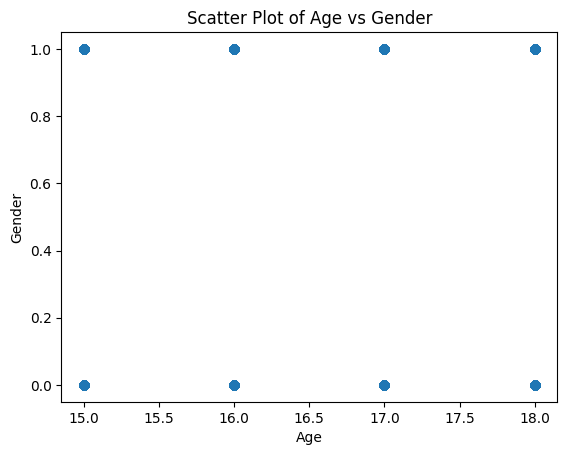

In [55]:
#Scatter Plot
plt.scatter(df['Age'], df['Gender'])
plt.xlabel('Age')
plt.ylabel('Gender')
plt.title('Scatter Plot of Age vs Gender')
plt.show()

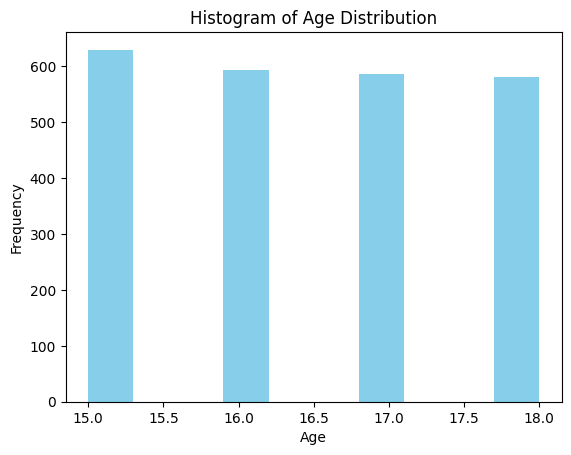

In [56]:
# Example: Creating a histogram for the 'Age' column
plt.hist(df['Age'], bins=10, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution')
plt.show()


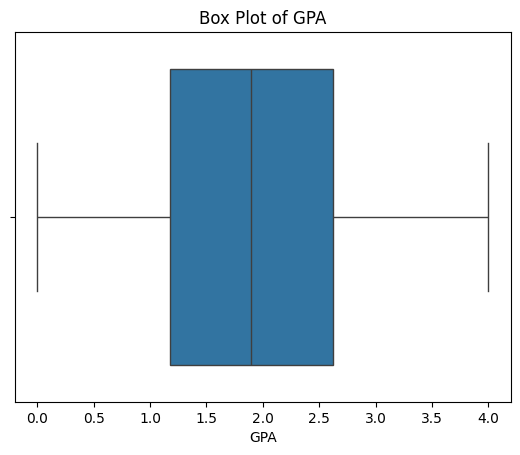

In [61]:
# Example: Creating a box plot for the 'GPA' column
sns.boxplot(x='GPA', data=df)
plt.title('Box Plot of GPA')
plt.show()

In [64]:
# Compute the correlation matrix
correlation_matrix = df.corr()

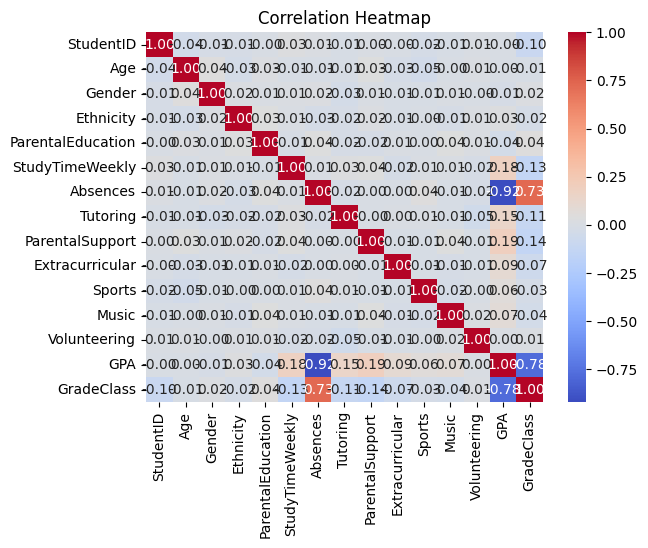

In [62]:


# Create the heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title and display the heatmap
plt.title('Correlation Heatmap')
plt.show()

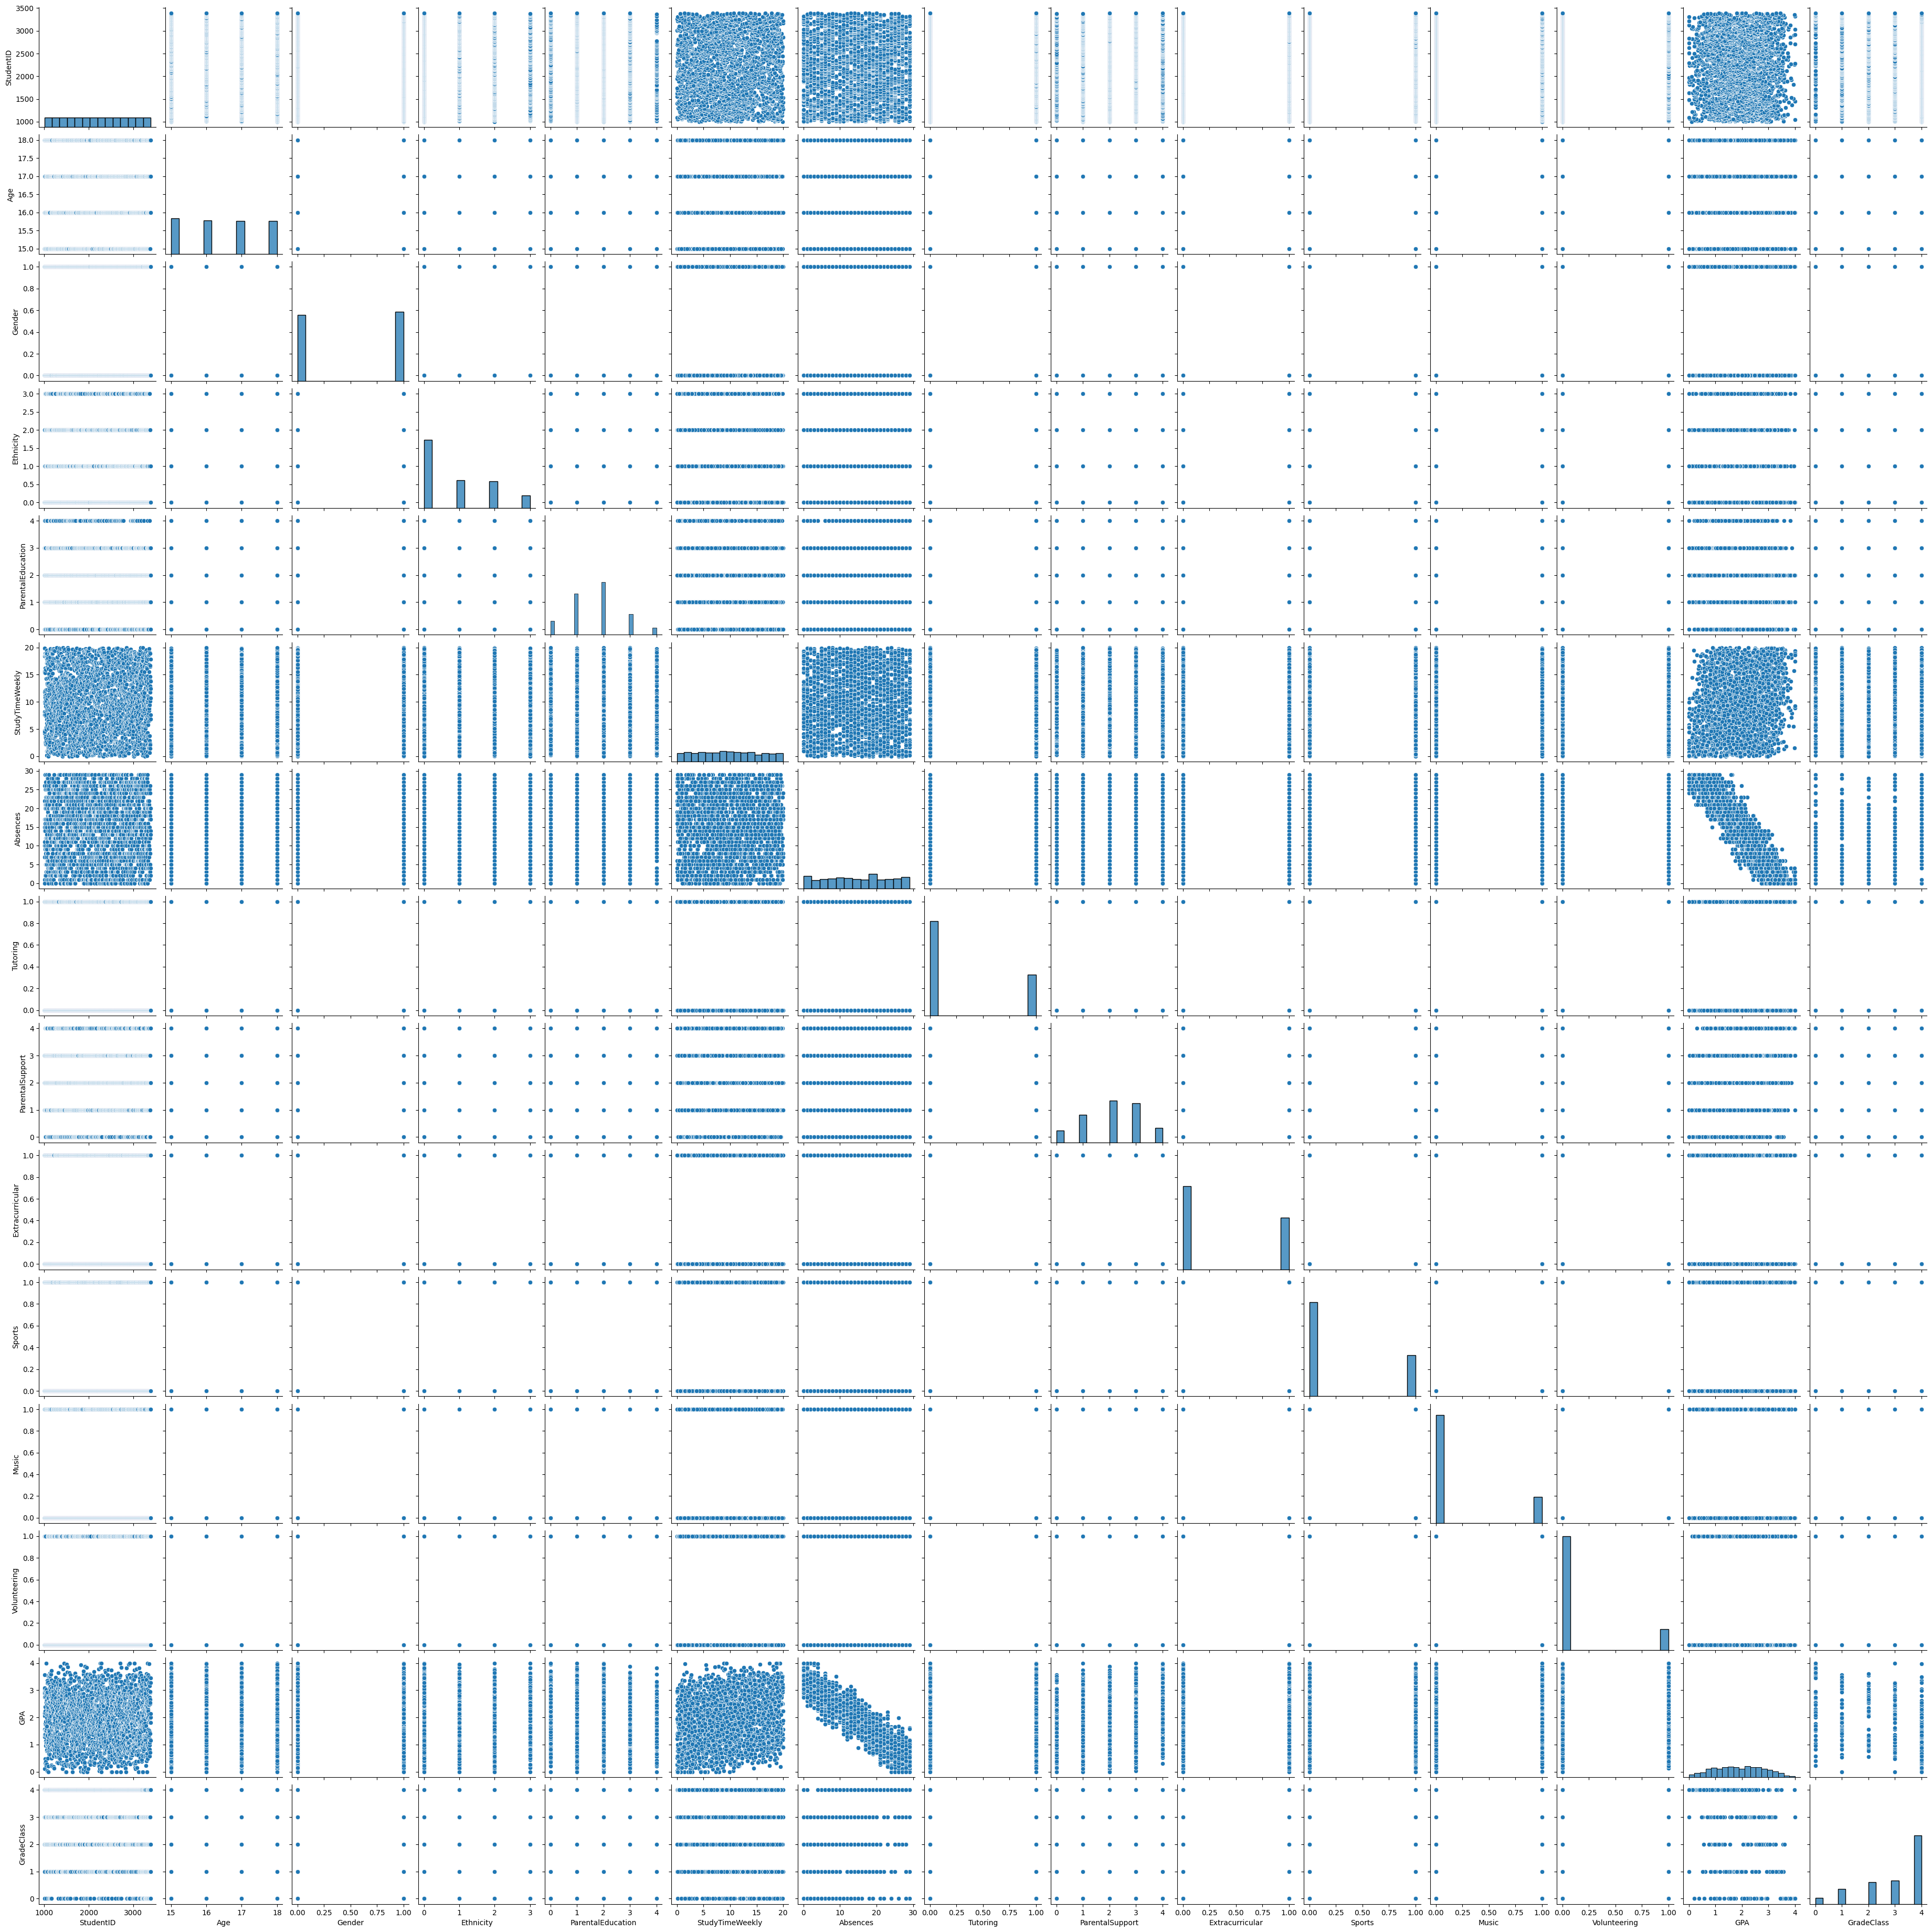

In [63]:
sns.pairplot(df)
plt.show()


In [67]:
#Calculates skewness and kurtosis to understand data distribution.
#Insight: Skewness indicates if the data is asymmetrically distributed, while kurtosis measures the tails' heaviness. 
# Both are useful for determining if normalization is needed.

df.skew()
df.kurtosis()



StudentID            0.000000
Age                  0.035793
Gender              -0.043516
Ethnicity            0.759067
ParentalEducation    0.215650
StudyTimeWeekly      0.050068
Absences            -0.026017
Tutoring             0.866045
ParentalSupport     -0.166859
Extracurricular      0.480094
Sports               0.855253
Music                1.525339
Volunteering         1.884851
GPA                  0.014526
GradeClass          -0.900807
dtype: float64

In [76]:
Q1 = df['GPA'].quantile(0.25)
Q3 = df['GPA'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['GPA'] < (Q1 - 1.5 * IQR)) | (df['GPA'] > (Q3 + 1.5 * IQR))]
print(outliers)

Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []


In [72]:
#Computes aggregated statistics (like mean, sum) for groups of data
df.groupby('Gender').agg({'GPA': 'mean'})


,GPA
Gender,
0,1.918679
1,1.894225
